<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_NCSA_Seaside_Building_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Update Seaside Building Inventory
The Seaside Building inventory needs to have the required attribute columns based on IN-CORE standards.

The inventory needs to be in a shapefile format.

The inventory needs to include the strcture id from the Address Point Invenotry for the Housing Unit Allocation algorithms.



In [ ]:
import pandas as pd   # Pandas for data frame manipulation
import geopandas as gpd # For reading in shapefiles
import numpy as np # For filling in missing values
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

In [ ]:
from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

C:\Users\nathanael99\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
pandas version:  0.24.2
numpy version:  1.20.1


In [ ]:
# Check working directory - good practice for relative path access
os.getcwd()

'G:\\Shared drives\\HRRC_IN-CORE\\Tasks\\P4.9 Testebeds\\WorkNPR'

In [ ]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache()

Enter username: natrose
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.0


In [ ]:
# create data_service object for loading files
data_service = DataService(client)

In [ ]:
# Seaside BUilding Inventory Version 5
bldg_inv_id = '5df40388b9219c06cf8b0c80'
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5df40388b9219c06cf8b0c80\seaside_bldg\seaside_bldg.shp


In [ ]:
gdf = bldg_inv.get_dataframe_from_shapefile()
gdf.head()

,FID_NEW,a_stories,appr_bldg,b_stories,bldg_id,broad_occ,bsmt_type,cont_val,dgn_lvl,dwell_unit,...,rmv_improv,rmv_land,sq_foot,stat_class,str_cst,str_prob,str_typ2,struct_typ,tract_id,year_built
0,5783,None,2895,None,None,None,None,None,Pre - Code,None,...,0.0,0.0,None,193,None,None,W1,W1,None,1968
1,5782,None,31878,None,None,None,None,None,Low - Code,None,...,0.0,0.0,None,193,None,None,W1,W1,None,1992
2,5781,None,5743,None,None,None,None,None,Low - Code,None,...,0.0,0.0,None,191,None,None,W1,W1,None,1974
3,5780,None,9598,None,None,None,None,None,Low - Code,None,...,0.0,0.0,None,193,None,None,W1,W1,None,1984
4,5779,None,1899,None,None,None,None,None,Pre - Code,None,...,0.0,0.0,None,190,None,None,W1,W1,None,1964


## Add link between Address Point Inventory and Building Inventory
In order for the Housing Unit Allocation link to the Building Inventory is the structure id.

Structure ID is a critical variable that links the building inventory with the address point inventory.

In [ ]:
# reading in Nathanael's building inventory - this version of the building inventory has structure id
bldg_inv_id_v2 = '5d5433edb9219c0689b98344'
dataset = Dataset.from_data_service(bldg_inv_id_v2, data_service)
filename = dataset.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5d5433edb9219c0689b98344\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_buildinginventory\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_buildinginventory.csv


In [ ]:
df = dataset.get_dataframe_from_csv()
df.head()

,strctid,blockid,parcelid,huestimate,x,y,landuse,guid,d_sf,insignific,moderate,heavy,complete
0,41007000000020005S,410079511001025,0,1,-123.900452,46.010494,422,d1efcbda-33ed-4e2f-ada9-103289097787,1,0.007564,0.220722,0.495246,0.276469
1,41007000000020009S,410079511003005,0,1,-123.932060,45.979836,900,1664a263-f670-4485-8fa2-fb8c77030b3a,1,0.008840,0.175102,0.532891,0.283167
2,41007020802001001S,410079507002020,20802,1,-123.918625,46.017567,142,04819c03-9e77-4a0e-96b7-5f9ef5067351,1,0.166990,0.496775,0.301215,0.035020
3,41007020853008001S,410079507002040,20853,1,-123.913643,46.017326,122,26c7457d-e252-40a7-a5db-5091cb9a6fe8,1,0.169053,0.497703,0.298854,0.034390
4,41007020853008002S,410079507002040,20853,1,-123.913643,46.017326,123,d0bbb5b2-8465-47f0-9ea4-51d7493e4c99,1,0.169053,0.497703,0.298854,0.034390


In [ ]:
# merging Nathanael's building inventory CSV with OSU's shapefile
gdf_new = pd.merge(gdf, df[['strctid', 'guid','x','y']], how='left', left_on='guid', right_on='guid')
print(len(df), len(gdf), len(gdf_new)) # checking lengths

3687 4679 4679


In [ ]:
gdf_new.guid.describe()

count                                     4679
unique                                    4679
top       b3919835-fa9c-4af0-8dba-4f1dd7cb9cad
freq                                         1
Name: guid, dtype: object

In [ ]:
gdf_new.strctid.describe()

count                   3687
unique                  3687
top       41007025739001001S
freq                       1
Name: strctid, dtype: object

## Confirm Structure ID merge location matches geometry

In [ ]:
gdf_new[['strctid', 'guid','x','y','geometry']].head()

,strctid,guid,x,y,geometry
0,41007020933038031S,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,-123.908997,46.014336,POINT (-123.90900 46.01433)
1,41007022416079053S,65d6e370-c05b-4b2f-bd17-d914d1d056c7,-123.905846,45.997948,POINT (-123.90585 45.99795)
2,41007020933038014S,dad76485-9694-409e-ac7f-c64c7bd5c32c,-123.908997,46.014336,POINT (-123.90900 46.01433)
3,41007020933038018S,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,-123.908997,46.014336,POINT (-123.90900 46.01433)
4,41007022789002002S,929f1040-6224-409d-b4e3-58946daf3b91,-123.911827,45.997475,POINT (-123.91183 45.99747)


In [ ]:
gdf_new.columns

Index(['FID_NEW', 'a_stories', 'appr_bldg', 'b_stories', 'bldg_id',
       'broad_occ', 'bsmt_type', 'cont_val', 'dgn_lvl', 'dwell_unit',
       'efacility', 'elev', 'geometry', 'gsq_foot', 'guid', 'major_occ',
       'no_stories', 'nstra_cst', 'nstrd_cst', 'occ_detail', 'occ_typ2',
       'occ_type', 'origin', 'parid', 'parid_card', 'period', 'repl_cst',
       'rmv_improv', 'rmv_land', 'sq_foot', 'stat_class', 'str_cst',
       'str_prob', 'str_typ2', 'struct_typ', 'tract_id', 'year_built',
       'strctid', 'x', 'y'],
      dtype='object')

# Clean mereged data to match 

The latest Building Inventory of a shape file is of version 6, we use the type
ergo:buildingInventoryVer6 

https://opensource.ncsa.illinois.edu/confluence/display/INCORE1/Building+Inventory+Datatype+Schema

Variables to include
v6
guid

strctid 

struct_typ

archetype

occ_type

appr_bldg

sq_foot

dwell_unit

no_stories

cont_val

str_typ2

efacility

parid

year_built

a_stories

b_stories

bsmt_type

gsq_foot

occ_detail

major_occ

broad_occ

repl_cst

str_cst

nstra_cst

nstrd_cst

dgn_lvl

occ_typ2

appr_land

appr_tot



In [ ]:
# create list of all required ergo:buildingInventoryVer6 columns
incore_columns = ['guid',
                  'strctid',
                  'struct_typ', 
                  'archetype', 
                  'occ_type', 
                  'appr_bldg', 
                  'sq_foot', 
                  'dwell_unit', 
                  'no_stories', 
                  'cont_val', 
                  'str_typ2', 
                  'efacility', 
                  'parid', 
                  'year_built', 
                  'a_stories', 
                  'b_stories', 
                  'bsmt_type', 
                  'gsq_foot', 
                  'occ_detail', 
                  'major_occ', 
                  'broad_occ', 
                  'repl_cst', 
                  'str_cst', 
                  'nstra_cst', 
                  'nstrd_cst', 
                  'dgn_lvl', 
                  'occ_typ2', 
                  'appr_land', 
                  'appr_tot']
incore_columns_df = pd.Series(incore_columns,name='varname')
incore_columns_df = pd.DataFrame(incore_columns,columns =['varname']).sort_values(by=['varname'])
incore_columns_df.head()

,varname
14,a_stories
5,appr_bldg
27,appr_land
28,appr_tot
3,archetype


### Compare IN-CORE Column list with Current list

In [ ]:
columnlist = pd.DataFrame(gdf_new.columns,columns =['varname']).sort_values(by=['varname'])
columnlist.head()

,varname
0,FID_NEW
1,a_stories
2,appr_bldg
3,b_stories
4,bldg_id


In [ ]:
columnlist_merge = columnlist.merge(incore_columns_df, how='outer', left_on='varname', right_on='varname', indicator = True)
columnlist_merge

,varname,_merge
0,FID_NEW,left_only
1,a_stories,both
2,appr_bldg,both
3,b_stories,both
4,bldg_id,left_only
5,broad_occ,both
6,bsmt_type,both
7,cont_val,both
8,dgn_lvl,both
9,dwell_unit,both


In [ ]:
left_only_cols = columnlist_merge.loc[columnlist_merge['_merge'] == 'left_only']
left_only_cols

,varname,_merge
0,FID_NEW,left_only
4,bldg_id,left_only
11,elev,left_only
12,geometry,left_only
22,origin,left_only
24,parid_card,left_only
25,period,left_only
27,rmv_improv,left_only
28,rmv_land,left_only
30,stat_class,left_only


In [ ]:
right_only_cols = columnlist_merge.loc[columnlist_merge['_merge'] == 'right_only']
right_only_cols

,varname,_merge
40,appr_land,right_only
41,appr_tot,right_only
42,archetype,right_only


In [ ]:
explore_columns = left_only_cols.varname.to_list()
explore_columns

['FID_NEW',
 'bldg_id',
 'elev',
 'geometry',
 'origin',
 'parid_card',
 'period',
 'rmv_improv',
 'rmv_land',
 'stat_class',
 'str_prob',
 'tract_id',
 'x',
 'y']

In [ ]:
gdf_new[explore_columns].head()

,FID_NEW,bldg_id,elev,geometry,origin,parid_card,period,rmv_improv,rmv_land,stat_class,str_prob,tract_id,x,y
0,5783,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,193,None,None,-123.908997,46.014336
1,5782,None,-14.826966,POINT (-123.90585 45.99795),1,None,0.35,0.0,0.0,193,None,None,-123.905846,45.997948
2,5781,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,191,None,None,-123.908997,46.014336
3,5780,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,193,None,None,-123.908997,46.014336
4,5779,None,-1.729172,POINT (-123.91183 45.99747),1,None,0.35,0.0,0.0,190,None,None,-123.911827,45.997475


In [ ]:
gdf_new.elev.describe()

count    4679.000000
mean       -4.117446
std         3.774860
min       -14.997761
25%        -4.181592
50%        -3.151248
75%        -2.119257
max         1.690376
Name: elev, dtype: float64

In [ ]:
gdf_new.origin.describe()

count     4679
unique       2
top          1
freq      4677
Name: origin, dtype: object

In [ ]:
gdf_new.parid_card.describe()

count     0
unique    0
Name: parid_card, dtype: int64

In [ ]:
gdf_new.period.describe()

count    4679.000000
mean        0.446516
std         0.156745
min         0.350000
25%         0.350000
50%         0.350000
75%         0.400000
max         0.750000
Name: period, dtype: float64

## Harmonize Building Value Variables

In [ ]:
gdf_new.rmv_improv.describe()

count    4.679000e+03
mean     1.749143e+05
std      4.824592e+05
min      0.000000e+00
25%      6.624350e+04
50%      1.131320e+05
75%      1.926190e+05
max      1.769744e+07
Name: rmv_improv, dtype: float64

In [ ]:
gdf_new.rmv_land.describe()

count    4.679000e+03
mean     1.449074e+05
std      2.646332e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.005870e+05
75%      1.546440e+05
max      6.453285e+06
Name: rmv_land, dtype: float64

In [ ]:
gdf_new.appr_bldg.describe()

count       4679
unique      3913
top       121253
freq          42
Name: appr_bldg, dtype: object

In [ ]:
gdf_new.appr_bldg = gdf_new.appr_bldg.astype(int)

In [ ]:
gdf_new.appr_bldg.describe()

count    4.679000e+03
mean     3.208858e+05
std      6.428265e+05
min      0.000000e+00
25%      1.572930e+05
50%      2.245680e+05
75%      3.179700e+05
max      1.901118e+07
Name: appr_bldg, dtype: float64

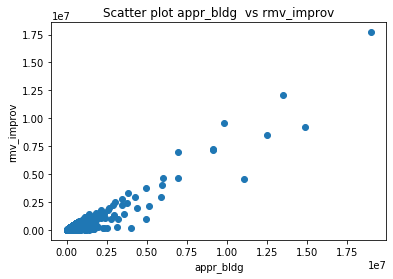

In [ ]:
import matplotlib.pyplot as plt
# Scatter Plot
plt.scatter(gdf_new['appr_bldg'], gdf_new['rmv_improv'])
plt.title('Scatter plot appr_bldg  vs rmv_improv')
plt.xlabel('appr_bldg')
plt.ylabel('rmv_improv')
plt.show()

In [ ]:
# Correlation
gdf_new[['appr_bldg','rmv_improv']].corr()

,appr_bldg,rmv_improv
appr_bldg,1.000000,0.928989
rmv_improv,0.928989,1.000000


In [ ]:
gdf_new[['rmv_improv','appr_bldg']].corr()

,rmv_improv,appr_bldg
rmv_improv,1.000000,0.928989
appr_bldg,0.928989,1.000000


In [ ]:
gdf_new['value_match'] = 0
gdf_new.loc[(gdf_new['rmv_improv'] == gdf_new['appr_bldg']), 'value_match'] = 1
gdf_new['value_match'].describe()

count    4679.000000
mean        0.223979
std         0.416953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: value_match, dtype: float64

## Harmonize Occupancy Type
Broad HAZUS Occupancy Category (e.g. RES3 - multi-family residential)

In [ ]:
gdf_new.occ_type.describe()

count     0
unique    0
Name: occ_type, dtype: int64

In [ ]:
gdf_new.occ_typ2.describe()

count     0
unique    0
Name: occ_typ2, dtype: int64

In [ ]:
gdf_new.occ_detail.describe()

count     0
unique    0
Name: occ_detail, dtype: int64

In [ ]:
gdf_new.stat_class.describe()

count     4679
unique     126
top        900
freq       899
Name: stat_class, dtype: object

### Check the Coordinate Reference System

In [ ]:
type(gdf_new.crs)

NoneType

In [ ]:
gdf_new.crs

In [ ]:
gdf_new['geometry'].head()

0    POINT (-123.90900 46.01433)
1    POINT (-123.90585 45.99795)
2    POINT (-123.90900 46.01433)
3    POINT (-123.90900 46.01433)
4    POINT (-123.91183 45.99747)
Name: geometry, dtype: geometry

In [ ]:
gdf_new.crs = "EPSG:4269"
gdf_new['geometry'].head()

0    POINT (-123.90900 46.01433)
1    POINT (-123.90585 45.99795)
2    POINT (-123.90900 46.01433)
3    POINT (-123.90900 46.01433)
4    POINT (-123.91183 45.99747)
Name: geometry, dtype: geometry

In [ ]:
gdf_new.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Save as Shapefile

In [ ]:
gdf.to_file("IN-CORE_Seaside_BuildingInventory_2021-03-19.shp")